In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Importing the dataset
white_wine_data=pd.read_csv('wine+quality/winequality-white.csv',sep=';')
red_wine_data=pd.read_csv('wine+quality/winequality-red.csv',sep=';')

print(white_wine_data.shape)
print(red_wine_data.shape)

(4898, 12)
(1599, 12)


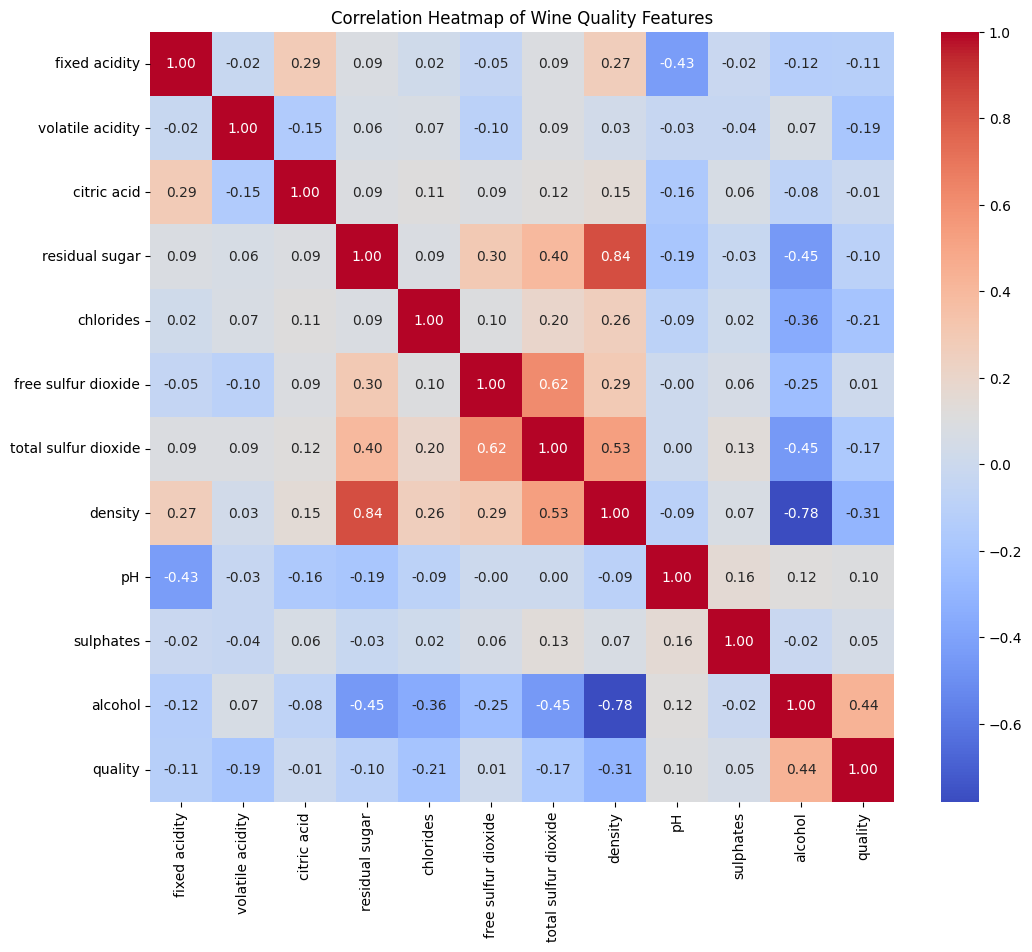

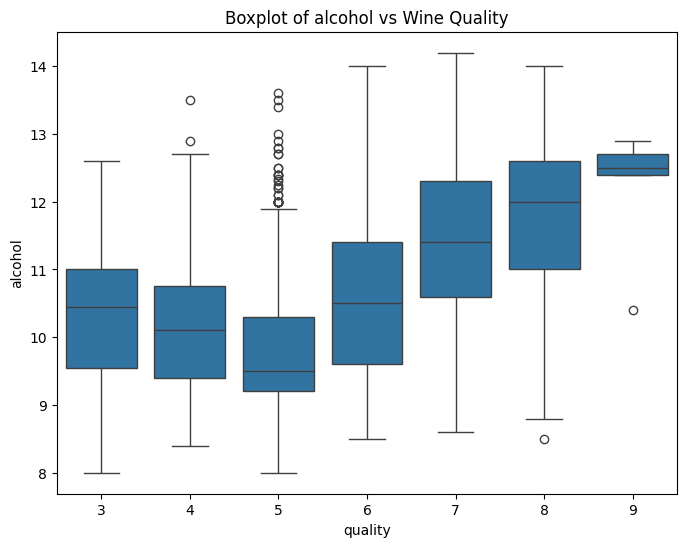

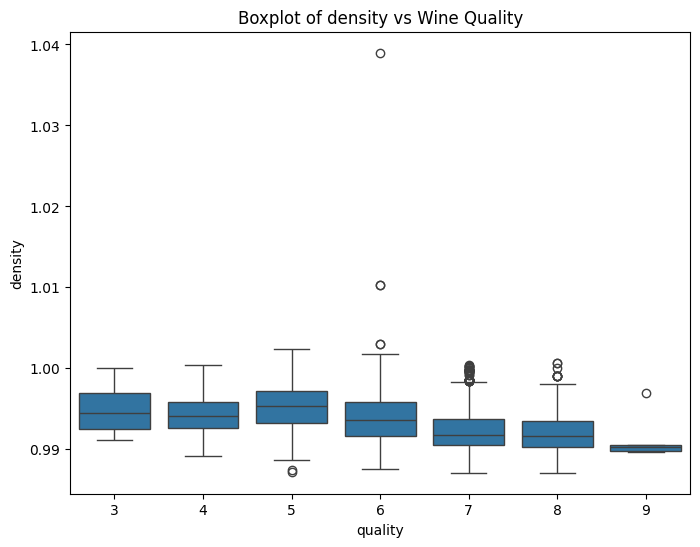

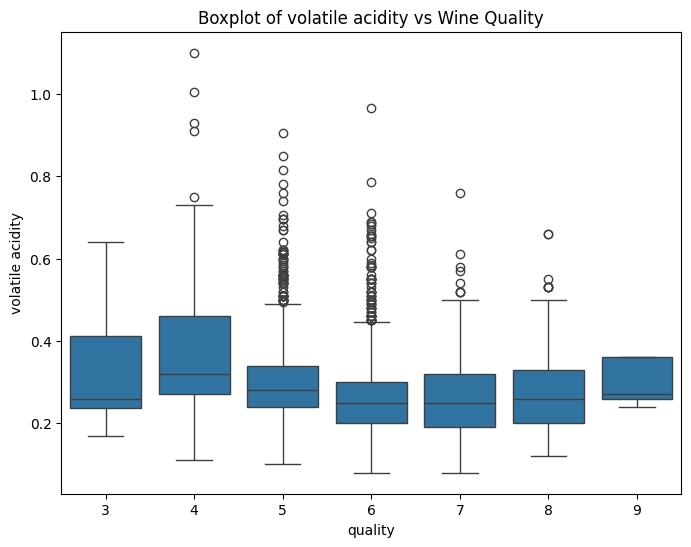

In [3]:
##Question 3

#calculate correlations
correlation_matrix = white_wine_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Quality Features')
plt.show()

# Selecting features with higher correlation for boxplot visualization
# Based on the heatmap, we might select alcohol, density, and volatile acidity for a closer look
features_to_plot = ['alcohol', 'density', 'volatile acidity']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=feature, data=white_wine_data)
    plt.title(f'Boxplot of {feature} vs Wine Quality')
    plt.show()



In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

##EXO 5

# Split the dataset into features (X) and target variable (y)
X = white_wine_data.drop('quality', axis=1)
y = white_wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a random forest regressor model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model using different metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importances
print("\nFeature Importances:")
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importances[i]}")



Mean Squared Error (MSE): 0.35615887755102044
Mean Absolute Error (MAE): 0.42374489795918363
R-squared Score: 0.5401275255309195

Feature Importances:
alcohol: 0.24161119684404095
volatile acidity: 0.12229819057076781
free sulfur dioxide: 0.11791807069234576
pH: 0.07138078929911479
residual sugar: 0.06923071199347666
total sulfur dioxide: 0.06848907316282747
chlorides: 0.06380446869896433
sulphates: 0.06266690616313948
fixed acidity: 0.0623853637696103
citric acid: 0.0611540796305034
density: 0.059061149175209125


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


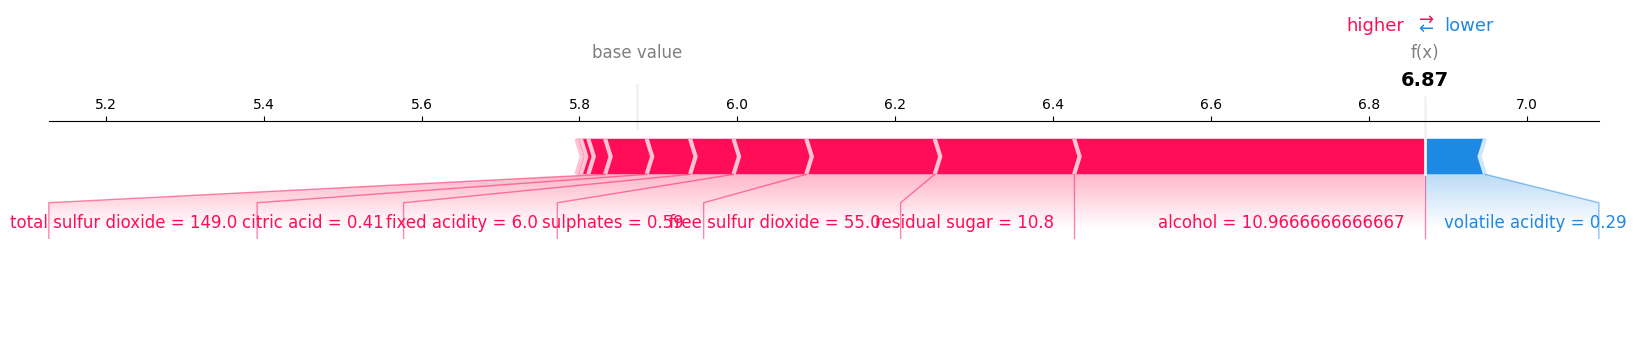

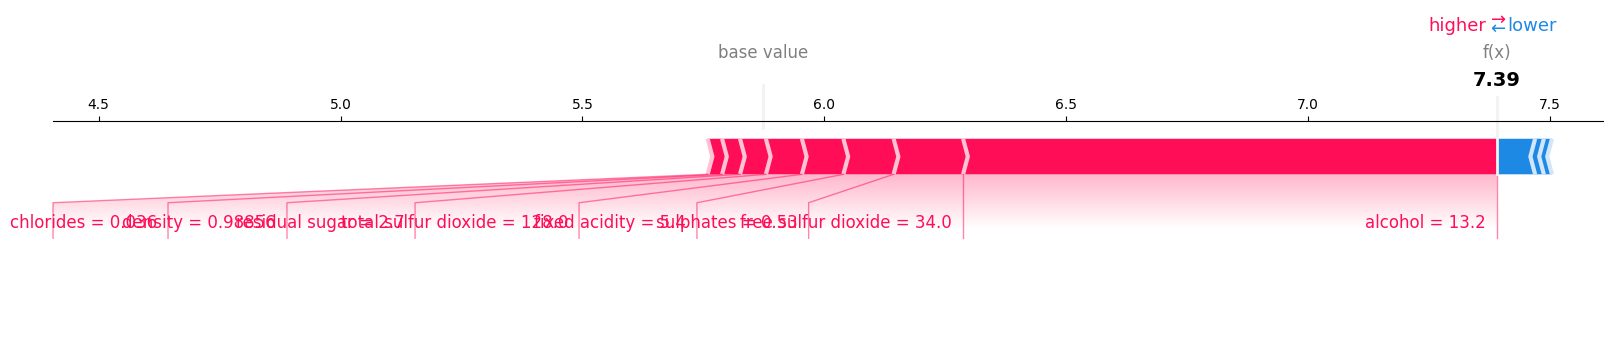

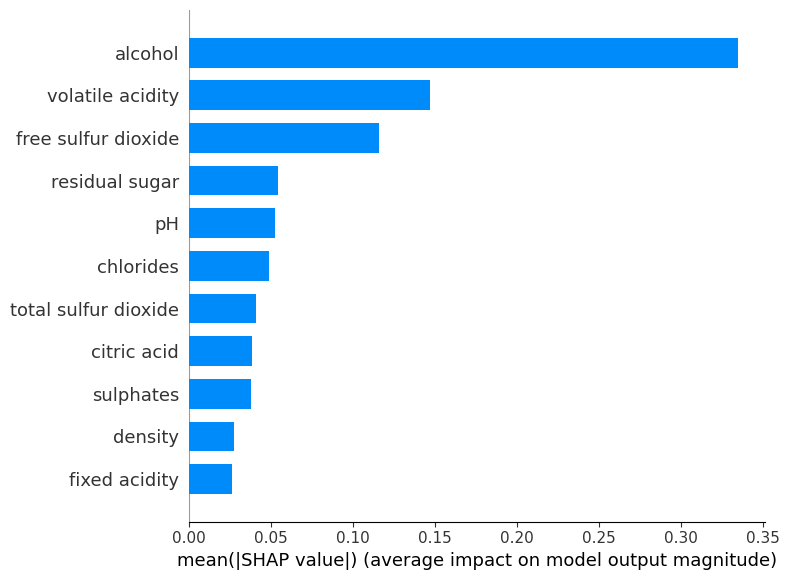

In [5]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:], matplotlib=True)
shap.summary_plot(shap_values, X_test, plot_type="bar")
